# Evaluating two online sales methods 

* Dataset involves customer data from an Ecommerce company that specializes in selling clothing online who also have in-store style and clothing advice sessions. 
* This company allows online shopping to be done via a website or via a mobile app. 
* In this project, I analyze the data to check which one of the two methods is better for sales.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
customers = pd.read_csv('C:/Datasets/Ecommerce Customers')

In [5]:
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [17]:
sns.set_style('whitegrid')
sns.set_palette('viridis')


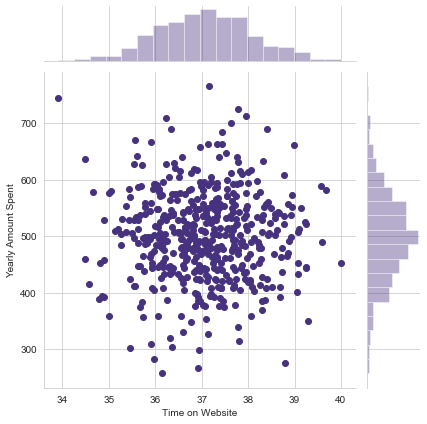

In [18]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=customers)

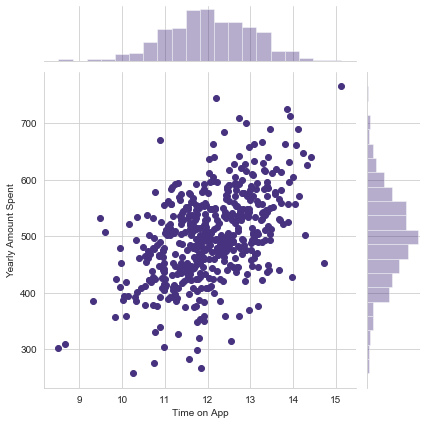

In [38]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent',data=customers)

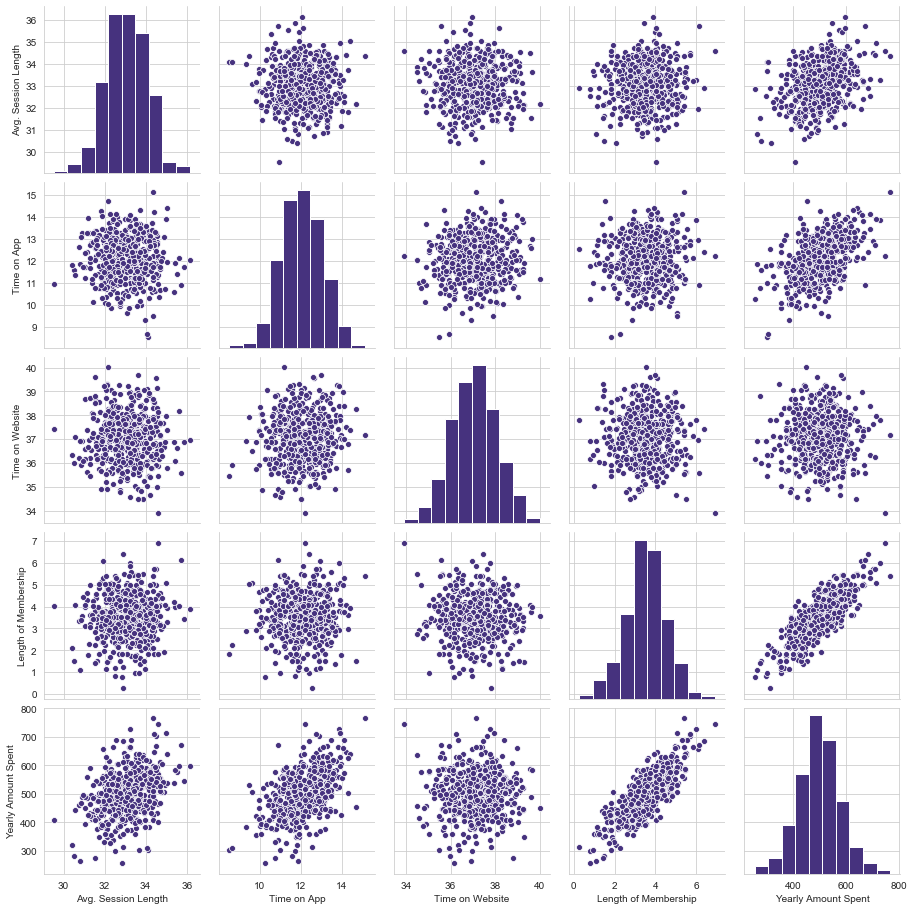

In [11]:
sns.pairplot(customers)

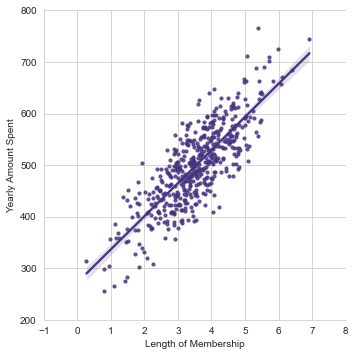

In [42]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,scatter_kws={'s':10})
plt.ylim(200,800);
plt.xlim(-1,8);


In [46]:
customers[['Yearly Amount Spent','Length of Membership']].corr()
# There exists a strong positive correlation between the yearly amount spent and the length of membership
# as evident from the plot above and the correlation table below

,Yearly Amount Spent,Length of Membership
Yearly Amount Spent,1.000000,0.809084
Length of Membership,0.809084,1.000000


In [64]:
# Machine Learning

In [ ]:
# 1. Split the data

In [48]:
y = customers['Yearly Amount Spent']

In [50]:
# Variable X is equal to only the numerical features of the customers dataset
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
# 2. Fit the training data to the model
# Utilizing a linear regression model here
from sklearn.linear_model import LinearRegression

In [55]:
lrm = LinearRegression()

In [56]:
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 3. Predict Test Data

In [59]:
Predict = lrm.predict( X_test)

(200, 800)

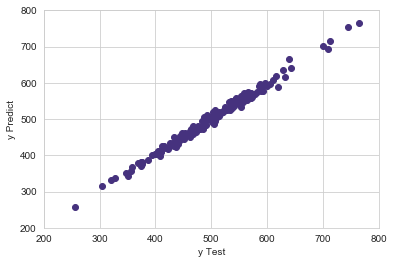

In [62]:
plt.scatter(y_test,Predict)
plt.xlabel('y Test')
plt.ylabel('y Predict')
plt.ylim(200,800)
plt.xlim(200,800)

In [65]:
# 4. Evaluate the Data 

In [72]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predict))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, Predict)))

Mean Absolute Error: 7.228148653430853
Mean Squared Error: 79.81305165097487
Root Mean Square Error: 8.933815066978656


In [73]:
coeffecients = pd.DataFrame(lrm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**A 1 unit increase in Time on App results in an increase of 38.6 dollars spent**\
**A 1 unit increase in Time on Website results in an increase of 0.2 dollards spent**

Currently, the mobile app is the better of the two methods.